# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

Отправлять дз не нужно, нужно закоммитить в github. Сдается дз лично преподавателю на рубежном контроле (13 марта)

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import math
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Cчитываем данные, полученные в результате выполнения домашнего задания из курса введения, в `data frame` библиотеки `pandas`. Достаем координаты и конвертируем в массив `numpy`. Возможно, в собранном вами файле кодировка будет иной.

In [2]:
data_df = pd.read_csv("vk_data.csv", sep=",").iloc[:, 1:]
data_df.head()

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,435,1,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.487519e+09
1,Дачная 2а,14,123,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.483478e+09
2,Лени Голикова 29,8,2,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,Героев Танкограда 63,8,158,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,Мусы Джалиля 14К1,36,99,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.485073e+09


In [3]:
x = data_df[['latitude', 'longitude']].values
print x

[[ 55.657941  37.751574]
 [ 53.202017  50.141377]
 [ 59.843376  30.23148 ]
 ..., 
 [ 55.76363   37.597046]
 [ 56.002732  37.209755]
 [ 47.225695  39.72997 ]]


Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1 Баранчиков Максим	
2 Бекбулатов Рамзан	
3 Белозёров Михаил	
4 Бобылев Владислав	
5 Брызгалов Антон	
6 Будюк Алексей	
7 Валиуллин Альберт	
8 Валиуллин Артур	
9 Васильев Евгений	
10 Галицкий Игорь	
11 Горшков Сергей	
12 Гусев Вячеслав	
13 Дегтярев Роман	
14 Дементьев Максим	
15 Елохов Артур	
16 Ефимов Владислав	
17 Зайцев Александр	
18 Ильин Иван	
19 Имеев Мерген	
20 Камалбеков Тимур	
21 Капитонов Александр	
22 Каспарьянц Георгий	
23 Кафанов Олег	
24 Клейменов Андрей	
25 Козлов Иван	
26 Колмакова Татьяна	
27 Комов Евгений	
28 Крылов Иван	
29 Кузьмина Ирина	
30 Куклева Анна	
31 Курьянов Илья	
32 Лобанов Алексей	
33 Лозинский Иван	
34 Лузин Игорь	
35 Лукьянчиков Иван	
36 Неред Максим	
37 Новикова Анастасия	
38 Новичков Сергей	
39 Омаров Темирхан	
40 Павлова Анастасия	
41 Петренко Иван	
42 Пилюгин Вадим	
43 Плошкин Александр	
44 Полякова Вера	
45 Попкова Екатерина	
46 Преображенский Анатолий	
47 Пронин Сергей	
48 Пучкин Данила	
49 Рогачев Александр	
50 Руденко Дмитрий	
51 Рыбаков Владислав	
52 Санников Артём	
53 Скиба Глеб	
54 Страдомский Сергей	
55 Тескер Константин	
56 Трифанов Петр	
57 Хапкин Артем	
58 Хорошенький Илья	
59 Чокля Дмитрий	
60 Шмурак Денис	
61 Щербакова Елена	

In [5]:
N = 16 # put your index here

In [6]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)", 
    u"OPTICS. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [334]:
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.stats import multivariate_normal as MN
from copy import deepcopy
from sklearn.cluster import KMeans
from collections import Counter

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, n_clusters=3, max_iter=100, eps=0.01):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.eps = eps
        return
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        init E_k = (max.k - min.k)/n_clusters, Sigma_k = identity matrix
        pi_k = 1/n_clusters
        k = 0, .. , n_clusters-1
        """
#         dif = x.max(axis=0) - x.min(axis=0)
        n_clusters = self.n_clusters
        km = KMeans(n_clusters=n_clusters).fit(x)
        self.x_len = len(x)
        x_len = len(x)
        x = np.matrix(x)
        Sigma = [np.matrix(np.zeros((x.shape[1], x.shape[1]))) for k in xrange(n_clusters)]
        Mu = [np.matrix(km.cluster_centers_[k]) for k in xrange(n_clusters)]
        Mu_old = deepcopy(Mu)
        pi = [Counter(km.labels_)[k] for k in xrange(n_clusters)]
        Gamma = np.zeros((n_clusters, x_len))
#         for k in xrange(n_clusters):
#             for n in xrange(x_len):
#                 Sigma[k] = Sigma[k] + (x[n] - Mu[k]).T*(x[n] - Mu[k])
#             Sigma[k] = Sigma[k] / x_len

        for k in xrange(n_clusters):
            idx = km.labels_==k
            Gamma[k][idx] = 1.0
#         print Gamma
            
        iters = self.max_iter
#         print pi
#         print Mu
#         print Sigma
#         ML = sum([np.log(sum([pi[k]*MN.pdf(x[n], Mu[k].tolist()[0], Sigma[k]) for k in xrange(n_clusters)])) for n in xrange(x_len)])
        changed = True
        while changed and iters:    
            #Maximization
#             Mu_old = deepcopy(Mu)
            for k in xrange(n_clusters):
                N_k = sum(Gamma[k])
                Mu[k].fill(0.0)
                Sigma[k].fill(0.0)
                for n in xrange(x_len):
                    Mu[k] = Mu[k] + Gamma[k, n]*x[n]
                Mu[k] = Mu[k] / N_k
                for n in xrange(x_len):
                    Sigma[k] = Sigma[k] + Gamma[k, n]*(x[n].T - Mu[k].T).dot(x[n] - Mu[k])
                Sigma[k] = Sigma[k] / N_k
                pi[k] = N_k / x_len
                
            #Expectation
            Gamma_old = deepcopy(Gamma)
            for n in xrange(x_len):
                ssum = sum([pi[j]*MN.pdf(x[n], Mu[j].tolist()[0], Sigma[j], allow_singular=True) for j in xrange(n_clusters)])
                for k in xrange(n_clusters):
                    Gamma[k, n] = pi[k]*MN.pdf(x[n], Mu[k].tolist()[0], Sigma[k], allow_singular=True) / ssum

#             ML_new = sum([np.log(sum([pi[k]*MN.pdf(x[n], Mu[k].tolist()[0], Sigma[k]) for k in xrange(n_clusters)])) for n in xrange(x_len)])
            
#             if iters < self.max_iter:
#                 print 'diff', ML_new - ML, ML_new, ML
#                 print 'pi', pi
            if np.linalg.norm(Gamma_old - Gamma) < self.eps :
                changed = False
#             if (iters < self.max_iter and np.abs(ML_new - ML) < self.eps) :
#                 changed = False
#             if (ML_new < ML):
#                 print 'something wrong'
#                 return
#             ML = ML_new
            iters -= 1
        
        print 'itterations left', iters
        
        self.Sigma = Sigma
        self.Mu = Mu
        self.pi = pi
        self.Gamma = Gamma
        
        return self
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        x_len = len(x)
        n_clusters = self.n_clusters
        Gamma = np.empty((n_clusters, x_len))
        Mu = self.Mu
        Sigma = self.Sigma
        pi = self.pi
        for k in xrange(n_clusters):
            for n in xrange(x_len):
                Gamma[k, n] = pi[k]*MN.pdf(x[n], Mu[k].tolist()[0], Sigma[k]) / sum([pi[j]*MN.pdf(x[n], Mu[j].tolist()[0], Sigma[j]) for j in xrange(n_clusters)])
        return self.Gamma.argmax(axis=0)
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.Gamma.argmax(axis=0)

In [191]:
em = Clustering(n_clusters=2)

In [116]:
x

array([[ 55.657941,  37.751574],
       [ 53.202017,  50.141377],
       [ 59.843376,  30.23148 ],
       ..., 
       [ 55.76363 ,  37.597046],
       [ 56.002732,  37.209755],
       [ 47.225695,  39.72997 ]])

In [94]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2).fit(x)
labels = gmm.predict(x)
l = gmm.predict_proba(x)
print gmm.means_

[[ 56.27754614  35.33573413]
 [ 55.5735525   57.12675248]]


In [166]:
em = em.fit(x)

diff 105.131025789 -34268.376881 -34373.5079068
diff 583.091745241 -33685.2851358 -34268.376881
diff 1361.91522067 -32323.3699151 -33685.2851358
diff 1528.24039036 -30795.1295248 -32323.3699151
diff 1062.96626747 -29732.1632573 -30795.1295248
diff 830.09375455 -28902.0695027 -29732.1632573
diff 1721.31520104 -27180.7543017 -28902.0695027
diff 3452.13884847 -23728.6154532 -27180.7543017
diff 1261.39585408 -22467.2195991 -23728.6154532
diff 56.7475067747 -22410.4720924 -22467.2195991
diff 9.05909393255 -22401.4129984 -22410.4720924
diff 1.34403795561 -22400.0689605 -22401.4129984
diff 0.176647288463 -22399.8923132 -22400.0689605
diff 0.0220357577746 -22399.8702774 -22399.8923132
diff 0.00269641802151 -22399.867581 -22399.8702774
itterations left 84


In [167]:
em.Gamma.argmax(axis=0)

array([1, 0, 1, ..., 1, 1, 0])

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

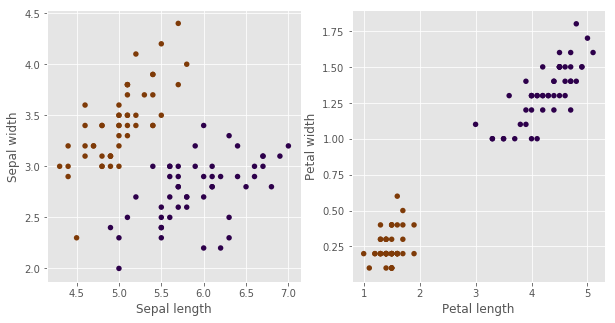

In [95]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

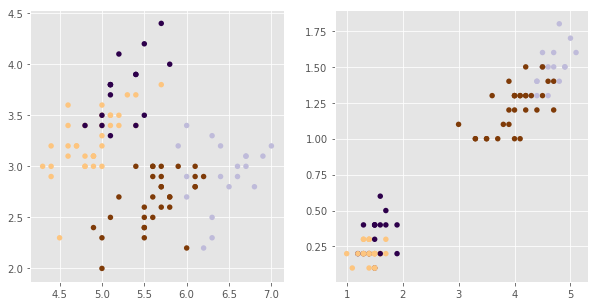

In [301]:
gmm = GMM(n_components=4).fit(x_iris)
labels = gmm.predict(x_iris)

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=labels, cmap=pl.cm.PuOr, lw=0, s=30)

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=labels, cmap=pl.cm.PuOr, lw=0, s=30)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
itterations left 99


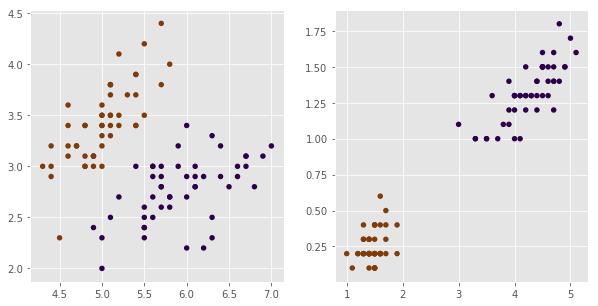

In [326]:
em = Clustering(n_clusters=2, eps=0.0001).fit(x_iris)
labels = em.Gamma.argmax(axis=0)

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=labels, cmap=pl.cm.PuOr, lw=0, s=30)

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=labels, cmap=pl.cm.PuOr, lw=0, s=30)

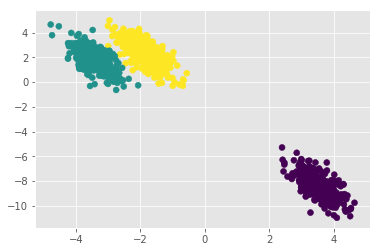

In [267]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=2,
                  centers=3, random_state=15)
Trans = [[ 0.40834549, -0.43667341],
         [-0.10887718, 0.829]]
X_t = X.dot(Trans)
plt.scatter(X_t[:,0], X_t[:,1], c=y)

[[-2.74149572  1.22771424]
 [ 3.52848333 -8.35644743]
 [-2.53154606  2.85740684]]
Counter({0: 334, 1: 334, 2: 332})


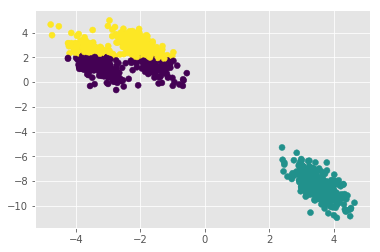

In [281]:
from collections import Counter
km = KMeans(n_clusters=3).fit(X_t)
lab = km.labels_
print km.cluster_centers_
val = Counter(km.labels_)
print val
km.c
plt.scatter(X_t[:,0], X_t[:,1], c=lab)

itterations left 79


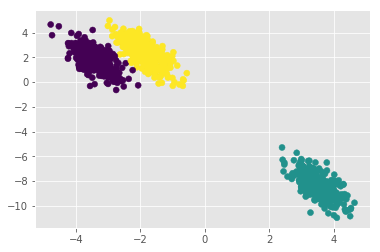

In [329]:
em = Clustering(n_clusters=3, eps=0.0001).fit(X_t)
labels = em.Gamma.argmax(axis=0)
plt.scatter(X_t[:,0], X_t[:,1], c=labels)

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [297]:
pred_iris = Clustering(n_clusters=2).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

itterations left 93
Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [304]:
def quality(x, y):
    """
    Implement quality criterion of your choice
    """
    cnt = Counter(y)
    n_clusters = len(cnt)
    J = 0
    for k in xrange(n_clusters):
        idx = y==k
        J = J + np.linalg.norm(x[idx] - x[idx].mean())**2
    return J

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [307]:
x

array([[ 55.657941,  37.751574],
       [ 53.202017,  50.141377],
       [ 59.843376,  30.23148 ],
       ..., 
       [ 55.76363 ,  37.597046],
       [ 56.002732,  37.209755],
       [ 47.225695,  39.72997 ]])

itterations left 14


/Users/vladislavefimov/my-venv/bin/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5000 but corresponding boolean dimension is 1667


itterations left 2
itterations left 13
itterations left 2
itterations left 0
itterations left 0
itterations left 1
itterations left 1
itterations left 7
itterations left 6
itterations left 7
itterations left 6
itterations left 6
itterations left 6
itterations left 6
itterations left 6
itterations left 6
itterations left 4
itterations left 3
itterations left 4


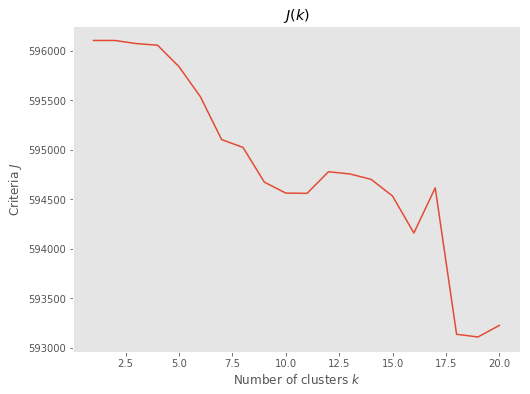

In [332]:
ks = range(1, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = Clustering(n_clusters=k, max_iter=15).fit(x[::3])
    y = cls.predict(x)
    criteria[i] = quality(x, y)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [333]:
k = 19
cls = Clustering(n_clusters=k, eps=0.001)
y = cls.fit_predict(x)

itterations left 91


Визуализируем кластеризацию на карте

/Users/vladislavefimov/my-venv/bin/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/vladislavefimov/my-venv/bin/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/vladislavefimov/my-venv/bin/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


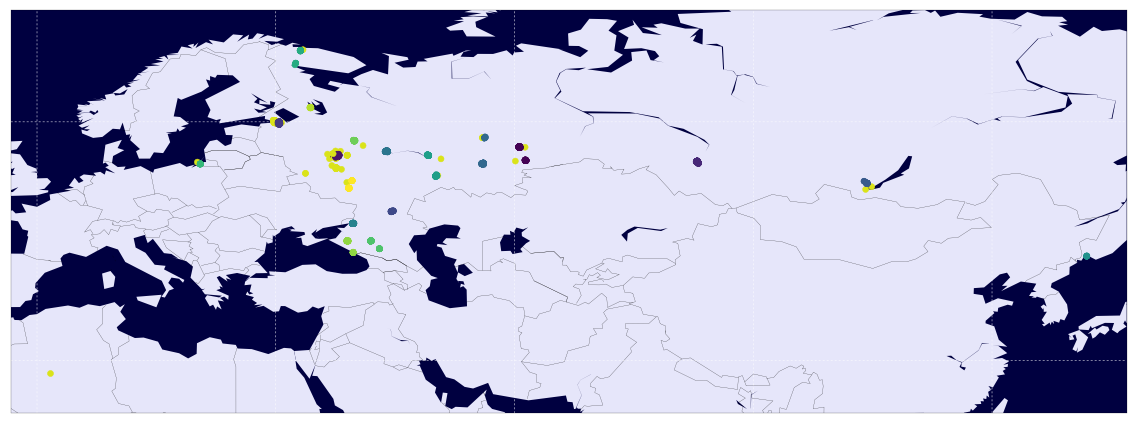

In [335]:
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=min(x[:, 0]) - 5, urcrnrlat=max(x[:, 0]) + 5, llcrnrlon=min(x[:, 1]) - 5, urcrnrlon=max(x[:, 1]) + 5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(x[:, 1], x[:,0], c=y, zorder=10)
    
pl.show()

Визуализируйте интересные участки (может быть это Москва) в приближенном виде. Постройте 3 (или более, в зависимости от данных, что вам самим бы хотелось увидеть ближе) увеличенных изображений карты с кластеризацией.

In [336]:
print Counter(y)

Counter({1: 1723, 3: 1236, 0: 400, 6: 222, 10: 206, 8: 190, 2: 175, 7: 146, 17: 136, 13: 102, 15: 101, 14: 98, 5: 57, 11: 56, 4: 51, 18: 40, 16: 36, 12: 17, 9: 8})


In [356]:
ind1 = y==1
ind2 = y==3
ind = ind1 + ind2
mos = x[ind]
mosy = y[ind]
mos.shape

(2959, 2)

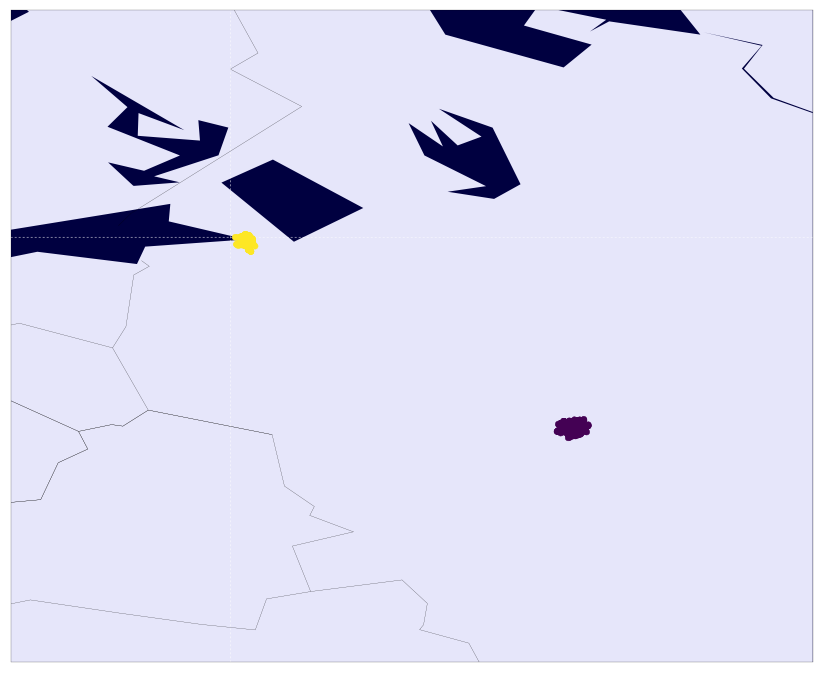

In [357]:
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=min(mos[:, 0]) - 5, urcrnrlat=max(mos[:, 0]) + 5, llcrnrlon=min(mos[:, 1]) - 5, urcrnrlon=max(mos[:, 1]) + 5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(mos[:, 1], mos[:,0], c=mosy, zorder=10)
    
pl.show()

In [358]:
import folium
from folium.plugins import MarkerCluster

In [373]:
mmap = folium.Map(location=mos.mean(axis=0).tolist(), zoom_start=5)
marker_cluster = MarkerCluster(locations=mos)
marker_cluster.add_to(mmap)

In [374]:
mmap

Видно, что самые популярные места: Питер и Москва

In [376]:
moscow = x[y==1]
mmap1 = folium.Map(location=moscow.mean(axis=0).tolist(), zoom_start=11)
marker_cluster1 = MarkerCluster(locations=moscow)
marker_cluster1.add_to(mmap1)
mmap1

In [377]:
pit = x[y==3]
mmap2 = folium.Map(location=pit.mean(axis=0).tolist(), zoom_start=11)
marker_cluster2 = MarkerCluster(locations=pit)
marker_cluster2.add_to(mmap2)
mmap2

Какой вывод можно сделать о качестве кластеризации?

В целом неплохо. Можно отдельно прогонять для "густых" мест как Москва и Питербург, и там искать отдельные кластеры. 

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.